In [1]:
import tensorflow as tf
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

Found 24998 files belonging to 2 classes.


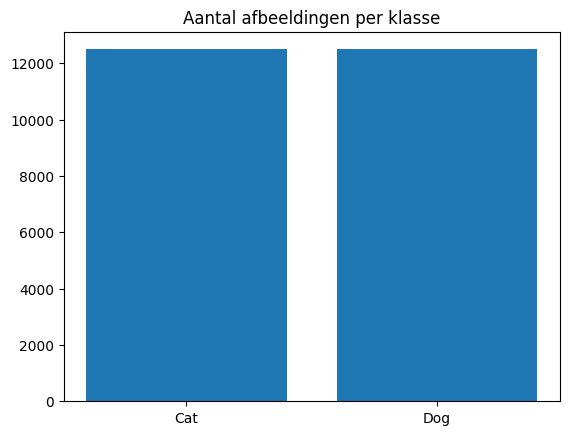

In [3]:
cat_count = len(os.listdir("train/Cat"))
dog_count = len(os.listdir("train/Dog"))
cat_count, dog_count

plt.bar(["Cat", "Dog"], [cat_count, dog_count])
plt.title("Aantal afbeeldingen per klasse")
plt.show()

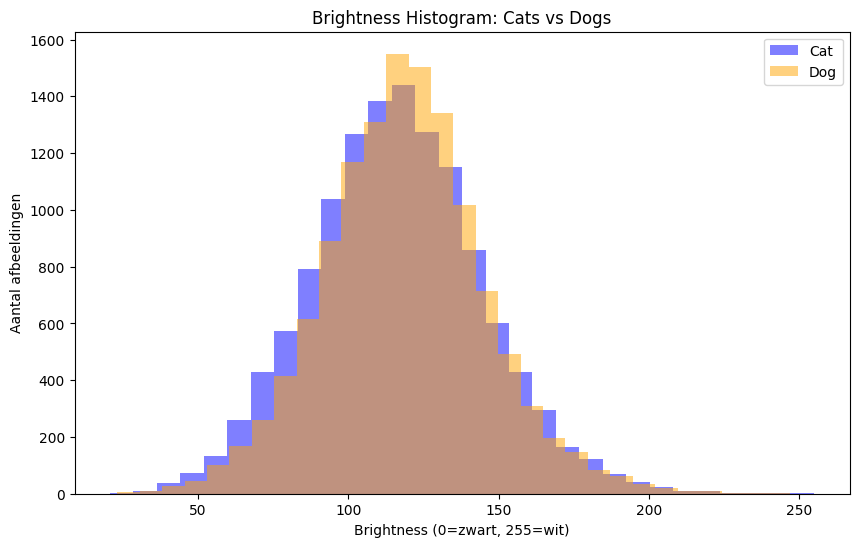

In [ ]:
# laat zien waar de afbeeldingen staan
folders = {
    "Cat": "train/Cat",
    "Dog": "train/Dog"
}

# lege lijst waar de helderheid word opgeslagen
brightness_data = {
    "Cat": [],
    "Dog": []
}

# opent afbeelding en zet om in grijswaarden (L betekent greyscaling)
# maakt een numpy array aan en berekent de gemiddelde helderheid
def get_brightness(img_path):
    img = Image.open(img_path).convert('L')
    arr = np.array(img)
    return arr.mean()

# loopt door alle bestanden heen in de juiste map 
# berekent de helderheid en slaat deze op in de juiste lijst
for label, folder in folders.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            brightness = get_brightness(file_path)
            brightness_data[label].append(brightness)
        except Exception as e:
            print(f"Fout bij {file_path}: {e}")

# de helderheid van katten in het blauw en honden in het oranje
# verdeeld 0-255 in 30 stukken
# alpha zorgt dat het een beetje doorzichtig is zodat je de overlappingen kan zien
# titels en labels toevoegen voor duidelijkheid
plt.figure(figsize=(10,6))
plt.hist(brightness_data["Cat"], bins=30, alpha=0.5, label="Cat", color='blue')
plt.hist(brightness_data["Dog"], bins=30, alpha=0.5, label="Dog", color='orange')
plt.xlabel("Brightness (0=zwart, 255=wit)")
plt.ylabel("Aantal afbeeldingen")
plt.title("Brightness Histogram: Cats vs Dogs")
plt.legend()
plt.show()



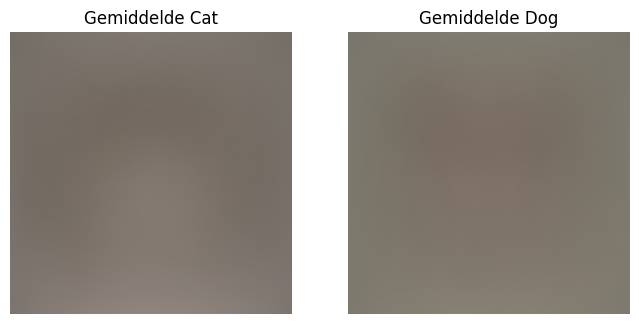

In [ ]:

def average_image(folder):
    imgs = []
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            img = Image.open(path).convert("RGB").resize((224, 224))
            imgs.append(np.array(img))
        except Exception as e:
            print("Skipping:", path, "Error:", e)
    return np.mean(np.stack(imgs), axis=0).astype(np.uint8)

avg_cat = average_image("train/Cat")
avg_dog = average_image("train/Dog")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Gemiddelde Cat")
plt.imshow(avg_cat)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gemiddelde Dog")
plt.imshow(avg_dog)
plt.axis("off")

plt.show()


In [4]:
# Definieer de mappen
data_dir = "train"
categories = ["Cat", "Dog"]

print("Controleren op corrupte afbeeldingen...")

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Methode 1: Probeer te openen met PIL en te verifiëren
            img = Image.open(file_path)
            img.verify() 
            
            # Methode 2: Probeer de afbeelding echt te decoderen met TensorFlow
            # Dit vangt de specifieke 'Input size mismatch' fouten op
            img_bytes = tf.io.read_file(file_path)
            tf.io.decode_image(img_bytes)
            
        except Exception as e:
            print(f"Verwijderen van corrupt bestand: {file_path} (Fout: {e})")
            # Sluit het bestand eerst als PIL het nog open heeft
            if 'img' in locals(): img.close()
            os.remove(file_path)

print("Check voltooid. Je kunt nu de rest van je code draaien.")

Controleren op corrupte afbeeldingen...
Verwijderen van corrupt bestand: train\Cat\10404.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP, WebP required. [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Cat\4351.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Dog\11233.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Dog\11912.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 o

c:\Users\lucfr\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Verwijderen van corrupt bestand: train\Dog\9500.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Check voltooid. Je kunt nu de rest van je code draaien.


Found 24991 files belonging to 2 classes.
Using 19993 files for training.
Found 24991 files belonging to 2 classes.
Using 4998 files for validation.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,755,202 (178.36 MB)

 Trainable params: 46,755,202 (178.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 817s 1s/step - accuracy: 0.5575 - loss: 0.6796 - val_accuracy: 0.6733 - val_loss: 0.6268
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 515s 824ms/step - accuracy: 0.7251 - loss: 0.5415 - val_accuracy: 0.7927 - val_loss: 0.4619
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 601s 882ms/step - accuracy: 0.8150 - loss: 0.4078 - val_accuracy: 0.8039 - val_loss: 0.4126
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 463s 741ms/step - accuracy: 0.8612 - loss: 0.3229 - val_accuracy: 0.8487 - val_loss: 0.3459
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 408s 654ms/step - accuracy: 0.8924 - loss: 0.2552 - val_accuracy: 0.8569 - val_loss: 0.3236
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.9163 - loss: 0.2038 - val_accuracy: 0.8685 - val_loss: 0.3196
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 386ms/step - accuracy: 0.9387 - loss: 0.1507 - val_accuracy: 0.8747 - val_loss: 0.3652
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 385ms/step - accuracy: 0.9540 - lo

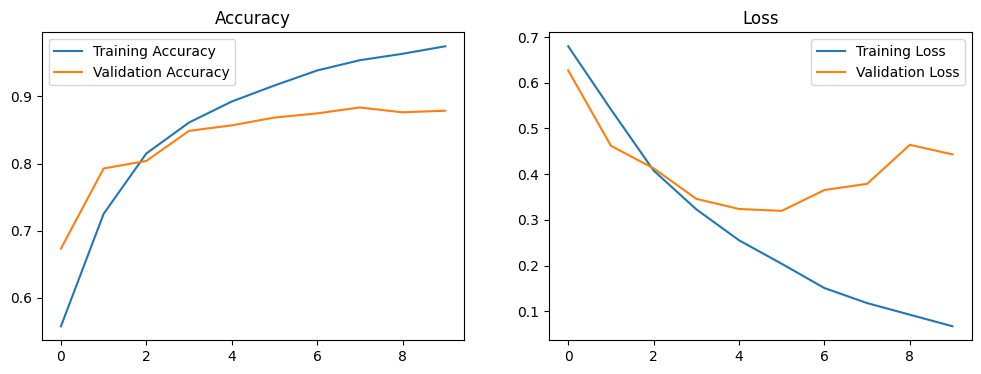

In [5]:

# 1. Data Inladen en Voorbereiden
# We gebruiken de image_size (224, 224) die je al in je EDA gebruikte.
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Validatie set (nodig om overfitting te monitoren)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Optimalisatie voor snelheid
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 2. AlexNet Model Definitie
def create_alexnet(input_shape, num_classes):
    model = models.Sequential([
        # Rescaling zorgt dat de pixels tussen 0 en 1 komen (belangrijk voor neurale netwerken)
        layers.Rescaling(1./255, input_shape=input_shape),
        
        # Layer 1: Conv + MaxPool
        layers.Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Layer 2: Conv + MaxPool
        layers.Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Layer 3, 4, 5: Conv + Conv + Conv + MaxPool
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Flatten naar Dense lagen
        layers.Flatten(),
        
        # Layer 6: Fully Connected + Dropout
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        # Layer 7: Fully Connected + Dropout
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        # Layer 8: Output (2 klassen: Cat en Dog)
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Model aanmaken
model = create_alexnet(input_shape=(224, 224, 3), num_classes=2)

# 3. Compileren
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4. Trainen
epochs = 10 # Pas dit aan op basis van je computerkracht
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# 5. Resultaten visualiseren
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()